<a href="https://colab.research.google.com/github/vaishnavidatir/Spark-Foundation-Internship-Task-/blob/main/Prediction_using_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spark Foundation : GRIP (October 2021)
###Author : Vaishnavi Datir (Data Science & Business Analytics Intern)
### Task1: Prediction Using supervised Learning

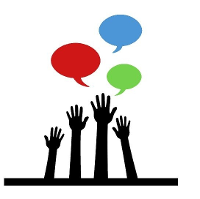

# Task 1 
Objective:  Predicting Score/percentage of student based on number of study hours and score for student who studies 9.2 hour/day

# Importing required libraries

In [ ]:
#Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


# Loading and Reading Dataset

In [ ]:
url = "http://bit.ly/w-data"
mydata = pd.read_csv(url)

In [ ]:
mydata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Summarising Data

In [ ]:
mydata.shape

(25, 2)

In [ ]:
mydata.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
mydata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
mydata.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Exploratory Data Analysis (EDA)

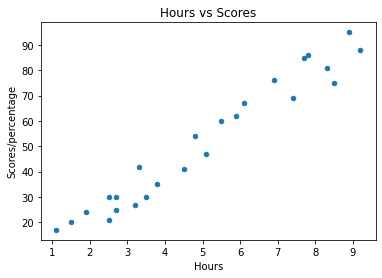

In [ ]:
mydata.plot.scatter(x='Hours',y='Scores',style='o')
plt.title("Hours vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores/percentage')
plt.show()

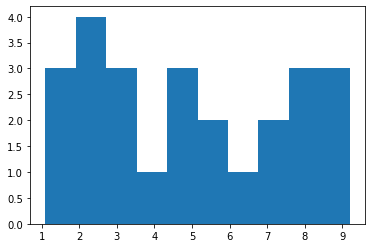

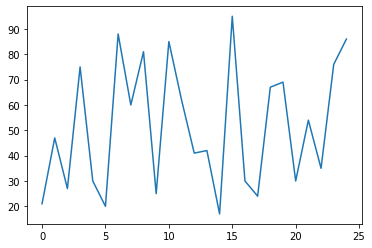

In [ ]:
plt.hist(mydata["Hours"])
plt.show()
plt.plot(mydata["Scores"])
plt.show()

In [ ]:
corr=mydata.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Spilting Data for Training and Testing 

In [ ]:
#prepared data
x_train = mydata.iloc[:,:-1]
y_train = pd.DataFrame(data = mydata.iloc[:,1].values,columns=['target'])




In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.25,random_state=0)
print(y_test)
x_train.shape

    target
5       20
2       27
19      69
16      30
11      62
22      35
17      24


(18, 1)

# Training Dataset using Linear Regression Model

In [ ]:
from sklearn import metrics
def print_error(x_test,y_test,model_name):
  prediction = model_name.predict(x_test)
  print('mean_absolute_error:',metrics.mean_absolute_error(y_test,prediction))
  print('mean_squared_error:',metrics.mean_squared_error(y_test,prediction))
  print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
  

In [ ]:
#Linear Regression
from sklearn import linear_model 
linear_regression = linear_model .LinearRegression()
linear_regression.fit(x_train,y_train)
print_error(x_test,y_test,linear_regression)
linear_regression.score(x_train,y_train)

mean_absolute_error: 4.130879918502482
mean_squared_error: 20.33292367497996
root_mean_squared_error: 4.509204328368805


0.9484509249326872

In [ ]:
linear_regression.score(x_test,y_test)

0.9367661043365056

##Prediction for 9.25 hours/day

In [ ]:
Hours = 9.25
Prediction = linear_regression.predict([[Hours]])
print("Number of Hours:",format(Hours))
print("Predicted percentage:",format(Prediction))

Number of Hours: 9.25
Predicted percentage: [[93.89272889]]


##The percentage score for student who will study for 9.2 Hr/Day will be 93.89 

#Thank you !!